In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style 
import seaborn as sns
df = pd.read_csv("C:/Users/62678/Desktop/Causal/data/enem_scores.csv")

# # order by 
df.sort_values(by="avg_score", ascending=False)

,year,school_id,number_of_students,avg_score
16670,2007,33062633,68,82.97
16796,2007,33065403,172,82.04
16668,2005,33062633,59,81.89
16794,2005,33065403,177,81.66
10043,2007,29342880,43,80.32
18121,2007,33152314,14,79.82
16781,2007,33065250,80,79.67
3026,2007,22025740,144,79.52
14636,2007,31311723,222,79.41
17318,2007,33087679,210,79.38


In [14]:
plot_data = (df
             .assign(top_school = df["avg_score"] >= np.quantile(df["avg_score"], .99))
             ["top_school", "number_of_students"]) # remove outliers

plt.figure(figsize=(6,6))
sns.boxplot(x="top_school", y="number_of_students", data=plot_data)
plt.title("Number of Students of 1% Top Schools (Right)");

KeyError: ('top_school', 'number_of_students')

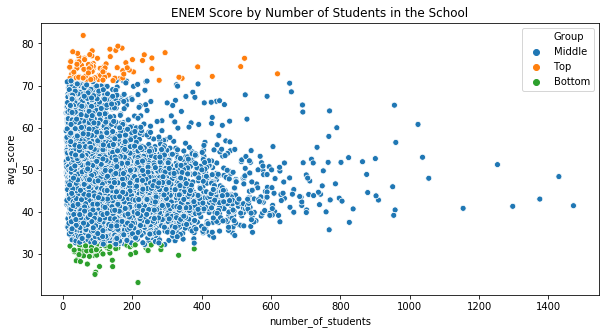

In [15]:
q_99 = np.quantile(df["avg_score"], .99)
q_01 = np.quantile(df["avg_score"], .01)


plot_data = (df
             .sample(10000)
             .assign(Group = lambda d: np.select([d["avg_score"] > q_99, d["avg_score"] < q_01],
                                                 ["Top", "Bottom"], "Middle")))
plt.figure(figsize=(10,5))
sns.scatterplot(y="avg_score", x="number_of_students", hue="Group", data=plot_data)
plt.title("ENEM Score by Number of Students in the School");

In [22]:
d_99=np.quantile(df["avg_score"],0.99)
d_01=np.quantile(df["avg_score"],0.01)
df.shape

(37941, 4)

Text(0.5,1,'ENEM Score by Number of Students in the School')

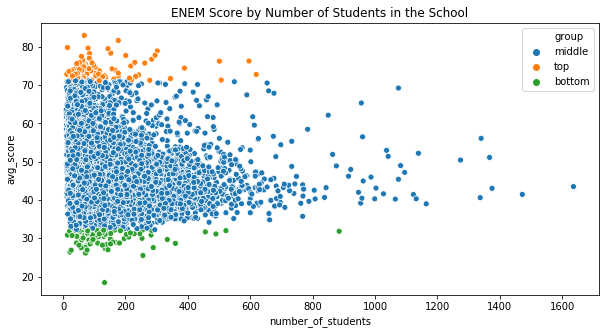

In [34]:
# assign用来创建新的一列，np.select相当于ifelse

plot_data=(df.assign(group=np.select([df["avg_score"]>d_99,df["avg_score"]<d_01],["top","bottom"],"middle"))).sample(10000)

plt.figure(figsize=(10,5))
sns.scatterplot(y="avg_score",x="number_of_students",hue="group",data=plot_data)
plt.title("ENEM Score by Number of Students in the School")